## Linear Mixed Model with iris dataset

### Degarege Nibret 
#### ID = GSR/5954/16

### Importing liberaries

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

### Load the Iris dataset

In [5]:
# Load the Iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame

In [6]:
# Add the species as a categorical variable
iris['species'] = iris_data.target_names[iris.target]
iris.drop(columns=['target'], inplace=True)

### Rename columns for simplicity

In [24]:
# Rename columns for simplicity
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Inspect the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Fit the Linear Mixed Model

In [26]:
# Fit the Linear Mixed Model
model = smf.mixedlm(
    "petal_width ~ sepal_length + petal_length + sepal_width",  # Fixed effects
    data=iris,
    groups=iris["species"]  # Random effect: species
)
lmm_model = model.fit()

# Display the summary of the model
print(lmm_model.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: petal_width
No. Observations: 150     Method:             REML       
No. Groups:       3       Scale:              0.0278     
Min. group size:  50      Log-Likelihood:     41.4680    
Max. group size:  50      Converged:          Yes        
Mean group size:  50.0                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.082    0.335  0.245 0.807 -0.575  0.740
sepal_length   -0.098    0.045 -2.199 0.028 -0.186 -0.011
petal_length    0.257    0.050  5.139 0.000  0.159  0.355
sepal_width     0.238    0.048  4.975 0.000  0.144  0.332
Group Var       0.257    1.636                           



Model interpretation

Fixed Effects:

•	Intercept: The intercept (0.082) is not statistically significant (p=0.807), indicating no meaningful baseline effect when predictors are at their reference values.

•	Sepal Length: Significant (p=0.028), with a negative relationship (β = −0.098). A one-unit increase in sepal_length leads to a 0.098-unit decrease in petal_width.

•	Petal Length: Highly significant (p<0.001), with a strong positive relationship (β=0.257). A one-unit increase in petal_length corresponds to a 0.257-unit increase in petal_width.

•	Sepal Width: Highly significant (p<0.001), with a positive relationship (β=0.238). A one-unit increase in sepal_width leads to a 0.238-unit increase in petal_width.

Random Effects:

•	Group Variance (0.257): Indicates modest variability in petal_width between species groups after accounting for fixed effects.

### Random effects

In [27]:
# Random effects
print("Random Effects:", lmm_model.random_effects)

Random Effects: {'setosa': Group   -0.533443
dtype: float64, 'versicolor': Group    0.075156
dtype: float64, 'virginica': Group    0.458286
dtype: float64}


### Check Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Extract predictors (excluding the intercept)
X = iris[["sepal_length", "petal_length", "sepal_width"]]

# Add constant for VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
vif_data

,Feature,VIF
0,const,129.503111
1,sepal_length,6.256954
2,petal_length,7.557780
3,sepal_width,1.839639


### Residual Analysis

In [44]:
# Residuals
print("Residuals:", lmm_model.resid)

Residuals: 0     -0.039124
1      0.060208
2      0.018583
3     -0.018798
4     -0.072771
         ...   
145    0.370187
146    0.101173
147    0.050500
148    0.174412
149   -0.182892
Length: 150, dtype: float64


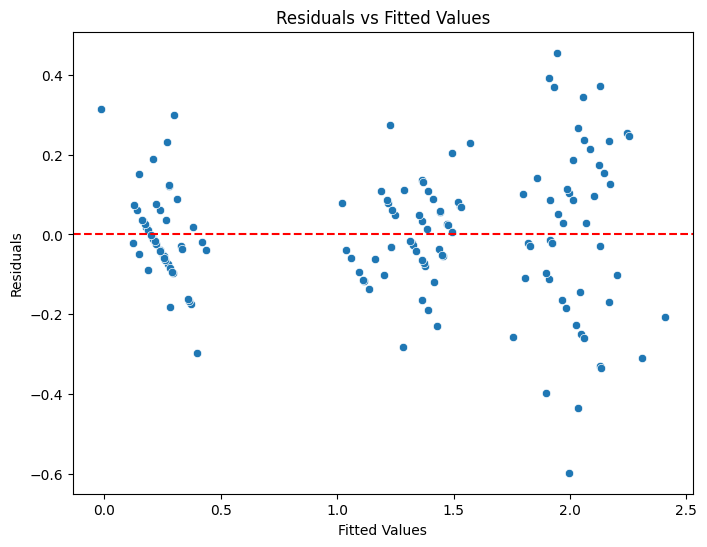

In [46]:
# Get residuals and fitted values
residuals = lmm_model.resid
fitted_values = lmm_model.fittedvalues

# Residual vs Fitted plot (Check for homoscedasticity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

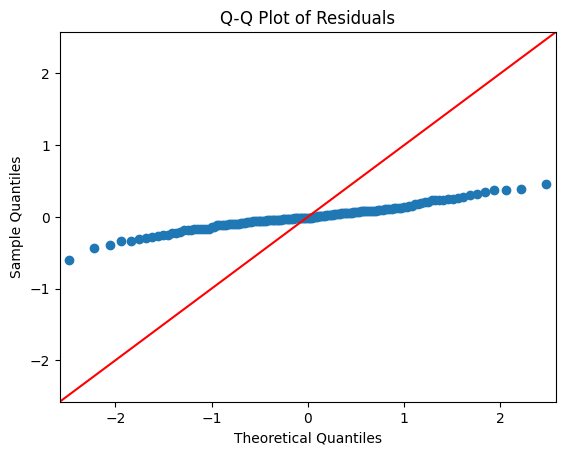

In [47]:
# Q-Q plot (Check for normality of residuals)
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()